# **Mise en place de la fonction coût métier**

# Imporatation des librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score, roc_auc_score, f1_score, recall_score, precision_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [4]:
print(sklearn.__version__)

1.0.2


In [5]:
print(np.__version__)
print(sns.__version__)

1.21.5
0.11.2


In [6]:
#pip install sklearn

# Importation des données originales

In [2]:
# données originales
path_1 = r"D:\DESKTOP IMPORTANT\Recherche d'emploi\OPENCLASSROOM\PROJET 7 Implémentez un modèle de scoring\Projet+Mise+en+prod+-+home-credit-default-risk\fichiers de travail\dataset_to_train_model_fill.csv"

In [3]:
train_df = pd.read_csv(path_1)
train_df

,Unnamed: 0,index,TARGET,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,0,1.0,100002,0.0,0.0,0.0,0.0,202500.0,406597.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,1,1,0.0,100003,1.0,0.0,1.0,0.0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,2,2,0.0,100004,0.0,1.0,0.0,0.0,67500.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,3,3,0.0,100006,1.0,0.0,0.0,0.0,135000.0,312682.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,4,4,0.0,100007,0.0,0.0,0.0,0.0,121500.0,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,307502,307506,0.0,456251,0.0,0.0,1.0,0.0,157500.0,254700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307503,307503,307507,0.0,456252,1.0,0.0,0.0,0.0,72000.0,269550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307504,307504,307508,0.0,456253,1.0,0.0,0.0,0.0,153000.0,677664.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307505,307505,307509,1.0,456254,1.0,0.0,0.0,0.0,171000.0,370107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [4]:
train_df = train_df.drop("Unnamed: 0", axis=1)
train_df

,index,TARGET,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,1.0,100002,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,1,0.0,100003,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,2,0.0,100004,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,3,0.0,100006,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,4,0.0,100007,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,307506,0.0,456251,0.0,0.0,1.0,0.0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307503,307507,0.0,456252,1.0,0.0,0.0,0.0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307504,307508,0.0,456253,1.0,0.0,0.0,0.0,153000.0,677664.0,29979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307505,307509,1.0,456254,1.0,0.0,0.0,0.0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [5]:
# ressotir uniquement les variables explicatives et dépendante
feat = [f for f in train_df.columns if f not in ["index", "SK_ID_CURR"]]

In [6]:
import re 

In [7]:
train_dff = train_df[feat]
train_dff = train_dff.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [8]:
train_dff

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,1.0,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
1,0.0,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
2,0.0,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,0.0,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,0.0,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,0.0,0.0,0.0,1.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307503,0.0,1.0,0.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307504,0.0,1.0,0.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
307505,1.0,1.0,0.0,0.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


# Rappel et redéfinition du modèle lightgbm ayant performé (voir notebook simulation)

Considérant les mêmes données d'entrainement que dans le notebook de simulation

In [9]:
X = train_dff.iloc[:, 1:].copy()
y = train_dff.TARGET.copy()

In [10]:
def train_dff_portion_(num_rows):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_rows, random_state=0, shuffle=True , stratify=y)
   
    return X_train, y_train, X_test, y_test

In [11]:
Xp, yp, Xi, yi = train_dff_portion_(20000)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=0.2, random_state=0, shuffle=True , stratify=yp)

In [13]:
my_model = LGBMClassifier(class_weight='balanced', max_depth=3, reg_alpha=0.1)

In [14]:
# entrainement du modèle my_model défini au niveau du notebook de simulation
my_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', max_depth=3, reg_alpha=0.1)

In [15]:
roc_auc_score(yi, my_model.predict_proba(Xi)[:, 1])

0.7462145466182905

La performance d'un modèle peut être résumée par un score unique qui fait la moyenne à la fois des
précision et le rappel, appelé F-mesure. La maximisation de la mesure F maximisera à la fois
la précision et le rappel en même temps

Plus F1 est grand plus la précision et le rappel sont maximiser et plus on réduit de façon équivalente les FP et les FN.
Par contre une autre métrique fbeta_score permet d'attribuer plus de poids à la minimisation des FN (recall plus décroissant) que les FP(precision décroissant avec une faible pente).

In [19]:
my_model.predict(Xi)

array([0., 1., 0., ..., 0., 0., 1.])

In [21]:
SEUIL = 0.7
y_pred_ = []
u=my_model.predict_proba(Xi)[:,1]
for i in u:
    if i >= SEUIL:
        y_pred_.append(1)
    else:
        y_pred_.append(0)
y_pred_ = np.array(y_pred_)
print(y_pred_)

[0 0 0 ... 0 0 0]


In [22]:
beta = 0.5
fbeta_score(yi , my_model.predict(Xi), beta=beta)

0.20763574289278444

Le seuil de classification implicite est de 50%.

In [23]:
my_model

LGBMClassifier(class_weight='balanced', max_depth=3, reg_alpha=0.1)

-----Evaluation du modèle {}----- 
               precision    recall  f1-score   support

     class 0       0.96      0.75      0.84      3677
     class 1       0.19      0.64      0.29       323

    accuracy                           0.74      4000
   macro avg       0.57      0.70      0.57      4000
weighted avg       0.90      0.74      0.80      4000



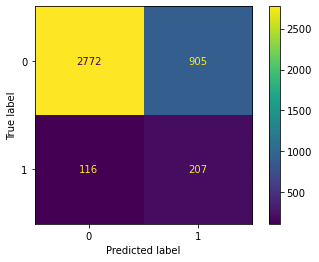

In [84]:
y_pred = my_model.predict(X_test)
cm_ = confusion_matrix(y_test, y_pred)
cm_display_ = ConfusionMatrixDisplay(cm_).plot()
cm_display_
target_names = ['class 0', 'class 1']
print("-----Evaluation du modèle {}-----", "\n", classification_report(y_test, y_pred, target_names=target_names))

Recherchons un seuil de classification conduisant à plus de minimisation des FN que de FP car un FN est 10 fois plus coûteux qu'un FP

In [25]:
np.bincount(y_pred_)

array([268042,  19465], dtype=int64)

In [27]:
# fbeta_score en fonction de Variation du seuil comprise entre 0 et 1 

def evaluation_fbeta(model , testX, testy, beta):

    """
    beta : coefficient beta de la métrique fbeta_score
    """
    seuil_class = np.linspace(0, 1, 100)
    probas_pred = model.predict_proba(testX)[:,1]
    fbeta = []
    for SEUIL in seuil_class :

        # Labels prédits pour un seuil donné
        label_pred_seuil= (probas_pred > SEUIL).astype(int)

        fbeta.append(fbeta_score(testy , label_pred_seuil, beta=beta))
        
    return fbeta


def evaluation_pre_rec(model, testX, testy, metric_score):
    
    """
    Evaluation de modèle selon suivant le recall ou le precision
    """
    seuil_class = np.linspace(0, 1, 100)
    probas_pred = model.predict_proba(testX)[:, 1]
    results = []
    for SEUIL in seuil_class :

        # Labels prédits pour un seuil donné
        label_pred_seuil = (probas_pred > SEUIL).astype(int)

        results.append(metric_score(testy, label_pred_seuil))
        
    return results

### Calcul de fbeta_score en fonction de seuil de classification défini

- Pour beta = [0.5, 1, 2, 3, 5]

In [28]:
fbeta0_5 = evaluation_fbeta(my_model , X_test, y_test, 0.5)
fbeta1 = evaluation_fbeta(my_model , X_test, y_test, 1)
fbeta2 = evaluation_fbeta(my_model , X_test, y_test, 2)
fbeta3 = evaluation_fbeta(my_model , X_test, y_test, 3)
fbeta5 = evaluation_fbeta(my_model , X_test, y_test, 5)
precision = evaluation_pre_rec(my_model , X_test, y_test, precision_score)
recall = evaluation_pre_rec(my_model , X_test, y_test, recall_score)

C:\Users\nokan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nokan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

In [29]:
# dataframe pour le futur le prochain tracé
dict_ = {"seuil": np.linspace(0, 1, 100),
         "precision": precision,
         "recall" : recall,
         "fbeta0_5" : fbeta0_5,
         "fbeta1"  : fbeta1,
         "fbeta2" : fbeta2,
         "fbeta3": fbeta3,
        "fbeta5" :fbeta5}
df = pd.DataFrame(dict_)
df

,seuil,precision,recall,fbeta0_5,fbeta1,fbeta2,fbeta3,fbeta5
0,0.000000,0.080750,1.0,0.098940,0.149433,0.305178,0.467642,0.695487
1,0.010101,0.080750,1.0,0.098940,0.149433,0.305178,0.467642,0.695487
2,0.020202,0.080750,1.0,0.098940,0.149433,0.305178,0.467642,0.695487
3,0.030303,0.080750,1.0,0.098940,0.149433,0.305178,0.467642,0.695487
4,0.040404,0.080811,1.0,0.099013,0.149537,0.305351,0.467845,0.695659
...,...,...,...,...,...,...,...,...
95,0.959596,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.969697,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.979798,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
98,0.989899,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


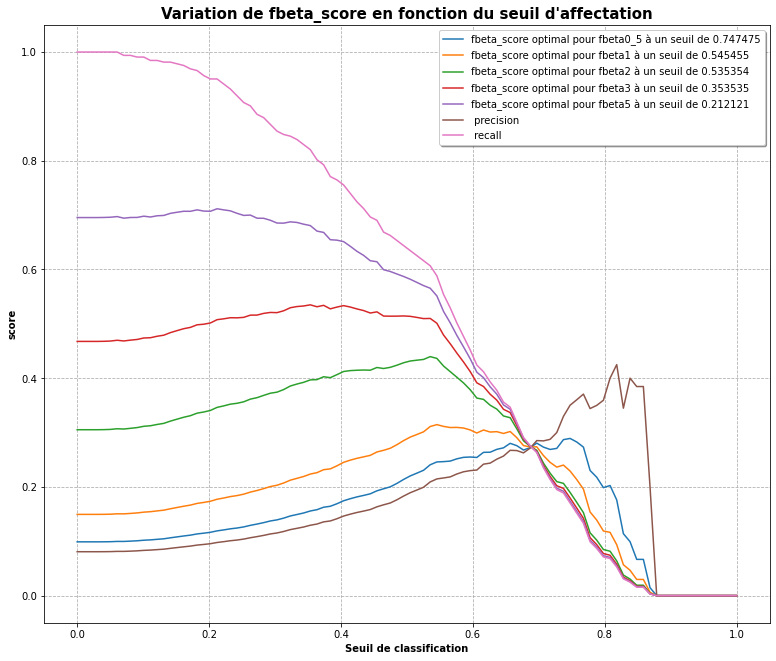

In [30]:
fig, ax = plt.subplots(1, figsize=(13, 11))
metric = {
          "fbeta0_5" : fbeta0_5,
          "fbeta1" : fbeta1,
          "fbeta2" : fbeta2,
          "fbeta3": fbeta3,
          "fbeta5" : fbeta5,
          "precision": precision,
          "recall" : recall}
for name, _ in metric.items() :
    if name in  {"fbeta0_5", "fbeta1", "fbeta2", "fbeta3", "fbeta5"} :
        k = df.seuil[np.argmax(_)]
        sns.lineplot(data=df, x="seuil" , y=name,
                        label="fbeta_score optimal pour {} à un seuil de {:.6f}".format(name, k))

    else:
        sns.lineplot(data=df, x="seuil" , y=name,
                        label=" {} ".format(name))
        
ax.set_title("Variation de fbeta_score en fonction du seuil d'affectation",
             fontsize=15, fontweight="bold")
ax.grid(linestyle='--')
plt.ylabel("score", fontweight="bold")
plt.xlabel("Seuil de classification", fontweight="bold")

plt.legend(shadow=True)
plt.show()

precision et recall se croisent au même seuil de classification que fbeta_score se croisent.
Quelle est cette valeur?
le seuil correspondant au fbeta_max évolue inversement à la pondération beta.
plus beta augmente on se rapproche de la métrique recall,
plus beta diminue on se rapproche de la métrique precision.
pour beta = 1, on a f1_score et on donne autant de poids à recall qu'à la précision.
Notons que pour le même seuil les prédictions sont identiques.


In [31]:
def predict_seuil(SEUIL_fbeta_max, model, testX):

    """probas_pred: prediction de classe selon le seuil
    """
    probas_pred = model.predict_proba(testX)[:, 1]
    
    # Labels prédits pour un seuil donné
    label_pred_seuil = (probas_pred > SEUIL_fbeta_max).astype(int)
   
    return label_pred_seuil

In [32]:
y_test

66385     0.0
30078     0.0
90240     1.0
243249    0.0
139606    0.0
         ... 
220128    0.0
120655    0.0
243366    1.0
83284     1.0
267145    0.0
Name: TARGET, Length: 4000, dtype: float64

-----Evaluation du modèle avec un seuil de 0.485----- 
               precision    recall  f1-score   support

     class 0       0.96      0.73      0.83      3677
     class 1       0.18      0.65      0.28       323

    accuracy                           0.73      4000
   macro avg       0.57      0.69      0.55      4000
weighted avg       0.90      0.73      0.79      4000



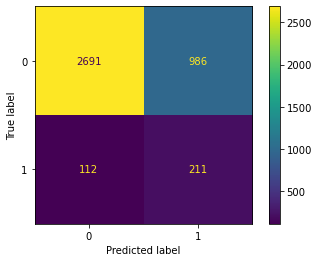

In [33]:
# prédiction pour le seuil de fbeta_max
SEUIL_fbeta_max = 0.485
y_pred = predict_seuil(SEUIL_fbeta_max, my_model, X_test)

# matrice de confusion associée

cm_ = confusion_matrix(y_test, y_pred)
cm_display_ = ConfusionMatrixDisplay(cm_).plot()
cm_display_

target_names = ['class 0', 'class 1']
print("-----Evaluation du modèle avec un seuil de {}-----".format(SEUIL_fbeta_max), "\n", classification_report(y_test, y_pred, target_names=target_names))

In [34]:
 from sklearn.metrics import RocCurveDisplay, roc_curve

In [37]:
# (y_true, y_score)
# Courbe ROC en fonction du seuil choisi

def roc_curve(y_test_s):
    """
    Trace la courbe en fonction du seuil choisi
    """
    fig, ax_roc = plt.subplots(1, figsize=(11, 11))

    RocCurveDisplay.from_predictions(y_test, y_test_s, ax=ax_roc)

    ax_roc.set_title('Receiver Operating Characteristic (ROC) curves', fontsize=15, fontweight="bold")
    ax_roc.grid(linestyle='--')

    plt.legend()
    plt.show()

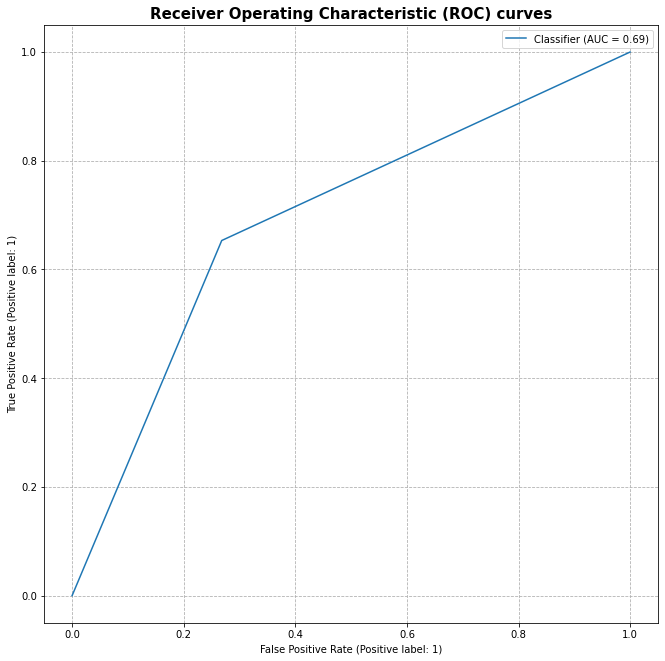

In [38]:
roc_curve(y_pred)

on résussit à réduire le taux de FN autour de 0.487 
Il est assez difficile de se baser la recherche d'un seuil optimal. Cependant puisque nous souhaitons une fonction fbetadans le but de minimiser les FN.
soit une perte sur la base loss = 1-fbeta2, peut être trouvera t'il le bon seuil.

**Information XGBClassifier**

Il existe l'argument **scale_pos_weight** utile pour mettre à l'échelle le gradient pour la classe positive. Nous l'introduisons donc dans l'étude  pour vérifier les performances de prédiction de XGBClassifier avec la courbe ROC. 

In [21]:
import xgboost
from xgboost import XGBClassifier

In [22]:
wneg = np.bincount(y_train)[0]
wpos = np.bincount(y_train)[1]
(wneg / wpos)

11.38390092879257

In [39]:
X_train.shape

(16000, 795)

In [48]:
cv = StratifiedKFold(5, shuffle=True, random_state=0)
model_xgb_roc = XGBClassifier(use_rmm=True, booster="gbtree", 
                          scale_pos_weight=(wneg / wpos), # pour l'équilibre des classes
                          random_state=0)

param_xgb = {"eta":[0.001, 0.01, 0.1, 1],
             'gamma': [0, 0.3, 0.5, 1, 1.5, 2, 5],
             'max_depth': [6, 7, 9, 10],
             "scale_pos_weight":[10, 11, (wneg / wpos),12, 14]
             }
rs_xgb_w_roc = RandomizedSearchCV(model_xgb_roc, param_xgb, cv=cv, scoring="roc_auc", n_jobs=-1)
rs_xgb_w_roc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           int...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                

In [51]:
rs_xgb_w_roc.best_params_

{'scale_pos_weight': 11.38390092879257,
 'max_depth': 10,
 'gamma': 1.5,
 'eta': 0.1}

In [85]:
# modèle xgboost avec le paramètre scale_pos_weight
model_xgb_roc_b = rs_xgb_w_roc.best_estimator_

In [86]:
roc_auc_score(yi, model_xgb_roc_b.predict_proba(Xi)[:, 1])

0.7165186532729961

# **Définition de la fonction coût**

## Nouveau modèle LightGBMClassifier : étude avec la métrique F2-Score

In [91]:
param_grid = {"n_estimator" : np.arange(200, 1000, 100),
              'learning_rate': [0.001, 0.01, 0.1],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
              'num_leaves': [31, 127],
              'reg_alpha': [0.1, 0.5]
                }

new_lgbm_model = LGBMClassifier(class_weight='balanced')

# Construction de la métrique d'évaluation
ftwo_scorer = make_scorer(fbeta_score, beta=2)
grid = RandomizedSearchCV(new_lgbm_model, param_grid, cv=cv, scoring=ftwo_scorer, n_jobs=-1, random_state=0)

In [93]:
grid.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: n_estimator


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LGBMClassifier(class_weight='balanced'), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'n_estimator': array([200, 300, 400, 500, 600, 700, 800, 900]),
                                        'num_leaves': [31, 127],
                                        'reg_alpha': [0.1, 0.5]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [89]:
grid.best_estimator_

LGBMClassifier(class_weight='balanced', learning_rate=0.01, max_depth=6,
               n_estimator=500, reg_alpha=0.1)

In [94]:
grid.best_estimator_

LGBMClassifier(class_weight='balanced', max_depth=2, n_estimator=600,
               reg_alpha=0.5)

In [18]:
# fonction pour définr la matrice de confusion associée
def Confusion_Mat(X_test, y_test, model, model_name:str):
    y_pred = model.predict(X_test)
    cm_ = confusion_matrix(y_test, y_pred)
    cm_display_ = ConfusionMatrixDisplay(cm_).plot()
    cm_display_
    plt.title("Matrice de confusion de {}".format(model_name))

    target_names = ['class 0', 'class 1']
    print("-----Evaluation du modèle {}-----".format(model_name), "\n", classification_report(y_test, y_pred, target_names=target_names))

-----Evaluation du modèle new_lgbm_model----- 
               precision    recall  f1-score   support

     class 0       0.96      0.72      0.83      3677
     class 1       0.18      0.68      0.28       323

    accuracy                           0.72      4000
   macro avg       0.57      0.70      0.55      4000
weighted avg       0.90      0.72      0.78      4000



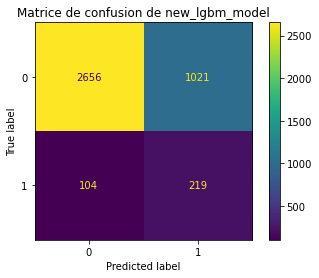

In [153]:
Confusion_Mat(X_test, y_test, grid.best_estimator_,"new_lgbm_model")

-----Evaluation du modèle new_model----- 
               precision    recall  f1-score   support

     class 0       0.96      0.72      0.82      3677
     class 1       0.17      0.67      0.28       323

    accuracy                           0.72      4000
   macro avg       0.57      0.70      0.55      4000
weighted avg       0.90      0.72      0.78      4000



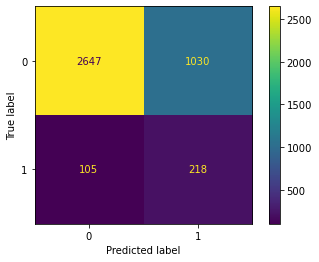

In [ ]:
# matrice de confusion associée
y_pred = grid.best_estimator_.predict(X_test)
cm_ = confusion_matrix(y_test, y_pred)
cm_display_ = ConfusionMatrixDisplay(cm_).plot()
cm_display_

target_names = ['class 0', 'class 1']
print("-----Evaluation du modèle {}-----".format("new_lgbm_model"), "\n", classification_report(y_test, y_pred, target_names=target_names))

### Etude de comparaison du modèle avec celui évalué sur la base de la métrique roc_auc

In [96]:
df_lgbm = pd.DataFrame(grid.cv_results_)
df_lgbm = df_lgbm[df_lgbm.rank_test_score == 1][["mean_fit_time", "mean_score_time"]]
df_lgbm

,mean_fit_time,mean_score_time
4,4.987343,0.126462


In [97]:
# mise en place de l'index
# Performance dans les temps d'apprentissage et de prédiction
model_stat = pd.DataFrame(index=df_lgbm.columns)
df_model = pd.DataFrame(grid.cv_results_)

In [98]:
df_model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,param_num_leaves,param_n_estimator,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.103295,0.118601,0.131218,0.015930,0.5,31,700,6,0.1,"{'reg_alpha': 0.5, 'num_leaves': 31, 'n_estima...",0.369764,0.318151,0.325120,0.348993,0.297097,0.331825,0.025188,10
1,13.989542,0.385864,0.125526,0.020691,0.1,127,800,5,0.001,"{'reg_alpha': 0.1, 'num_leaves': 127, 'n_estim...",0.369596,0.377744,0.361702,0.371287,0.343764,0.364818,0.011702,6
2,12.966839,0.540181,0.123697,0.014986,0.5,31,600,5,0.001,"{'reg_alpha': 0.5, 'num_leaves': 31, 'n_estima...",0.362791,0.372449,0.358515,0.370005,0.343612,0.361474,0.010225,7
3,5.105484,0.382864,0.113707,0.024735,0.1,127,500,2,0.001,"{'reg_alpha': 0.1, 'num_leaves': 127, 'n_estim...",0.376214,0.343429,0.346030,0.386574,0.351090,0.360667,0.017413,9
4,4.987343,0.101660,0.126462,0.016705,0.5,31,600,2,0.1,"{'reg_alpha': 0.5, 'num_leaves': 31, 'n_estima...",0.395865,0.393519,0.411765,0.409386,0.394076,0.400922,0.007956,1
5,12.308097,0.259118,0.114783,0.006348,0.5,127,300,5,0.001,"{'reg_alpha': 0.5, 'num_leaves': 127, 'n_estim...",0.362791,0.372449,0.358515,0.369640,0.343612,0.361401,0.010165,8
6,8.461047,0.207570,0.109775,0.010793,0.1,127,600,4,0.01,"{'reg_alpha': 0.1, 'num_leaves': 127, 'n_estim...",0.381962,0.385772,0.408666,0.387097,0.374200,0.387539,0.011478,2
7,7.208703,0.135264,0.103544,0.006886,0.1,31,500,4,0.1,"{'reg_alpha': 0.1, 'num_leaves': 31, 'n_estima...",0.390982,0.362529,0.422494,0.384396,0.351744,0.382429,0.024576,3
8,18.973448,0.800532,0.132733,0.014024,0.5,127,400,6,0.01,"{'reg_alpha': 0.5, 'num_leaves': 127, 'n_estim...",0.360409,0.346616,0.386513,0.382514,0.358696,0.366949,0.015161,4
9,17.032334,3.387604,0.099978,0.040251,0.1,31,500,8,0.001,"{'reg_alpha': 0.1, 'num_leaves': 31, 'n_estima...",0.375512,0.362144,0.368398,0.365169,0.356114,0.365467,0.006452,5


In [99]:
df_model[df_model.rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_alpha,param_num_leaves,param_n_estimator,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,4.987343,0.10166,0.126462,0.016705,0.5,31,600,2,0.1,"{'reg_alpha': 0.5, 'num_leaves': 31, 'n_estima...",0.395865,0.393519,0.411765,0.409386,0.394076,0.400922,0.007956,1


In [100]:
df_model = (df_model[df_model.rank_test_score == 1][["mean_fit_time", "mean_score_time"]].T).values

In [101]:
df_model

array([[4.98734274],
       [0.12646194]])

In [102]:
grid.best_params_

{'reg_alpha': 0.5,
 'num_leaves': 31,
 'n_estimator': 600,
 'max_depth': 2,
 'learning_rate': 0.1}

In [103]:
grid.best_estimator_

LGBMClassifier(class_weight='balanced', max_depth=2, n_estimator=600,
               reg_alpha=0.5)

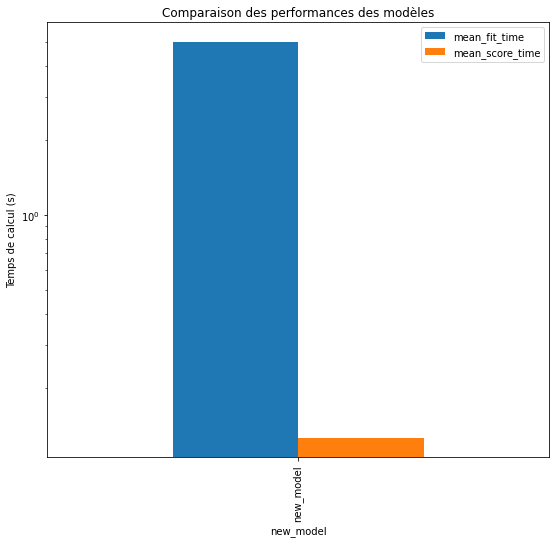

In [104]:
model_stat["new_model"] = df_model
del df_model

# mise en place de l'index
model_stat = model_stat.T
model_stat["new_model"] = model_stat.index

# Performance dans les temps d'apprentissage et de prédiction
model_stat.plot(x="new_model", y=["mean_fit_time", "mean_score_time"], kind="bar", figsize=(9, 8),)
plt.ylabel("Temps de calcul (s)")
plt.title("Comparaison des performances des modèles")
plt.yscale('log') 
plt.show()

**Evaluation du modèle via l'auc_roc**

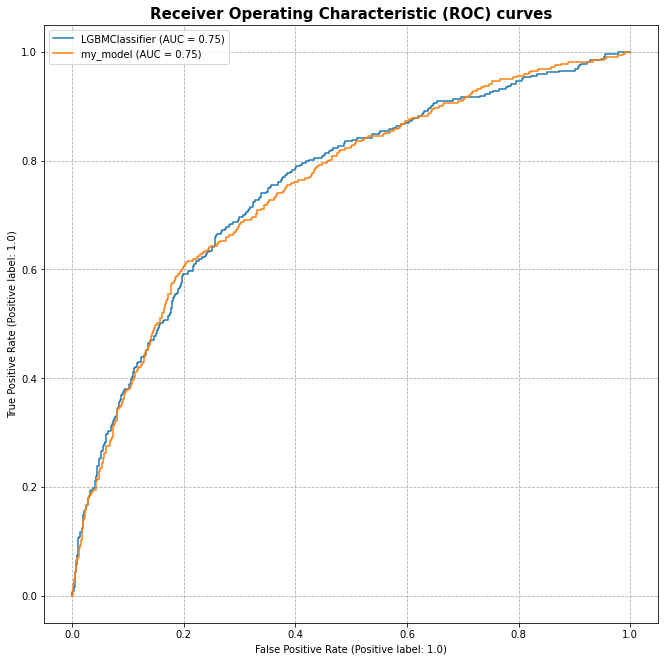

my_mdel 0.751
LGBMClassifier 0.754


In [118]:
# courbe roc 
fig, ax = plt.subplots(1, figsize=(11, 11))
models = {"LGBMClassifier": grid.best_estimator_,
          "my_model" : my_model}

for name, model in models.items(): 
  
    RocCurveDisplay.from_estimator(
            model, X_test, y_test, ax=ax, name=name)
        
ax.set_title('Receiver Operating Characteristic (ROC) curves', fontsize=15, fontweight="bold")
ax.grid(linestyle='--')

plt.legend()
plt.show()

print("my_mdel {:.3f}".format(roc_auc_score(y_test, my_model.predict_proba(X_test)[:,1])))
print("LGBMClassifier {:.3f}".format(roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test)[:,1])))

Il y a une augmentation de 3 millièmes du score correspondant à une diminution des FN et une augmentation des FP et une baisse du score de classification.
On a également dans ce cas légèrement une grande précision de notre nouveau modèle évalué sur via la métrique F2-score.   

In [62]:
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
np.bincount(y)

array([282682,  24825], dtype=int64)

**Information XGBClassifier**

Il existe l'argument **scale_pos_weight** utile pour mettre à l'échelle le gradient pour la classe positive. Nous l'introduisons donc dans l'étude de fonction coût pour vérifier les performances de prédiction de XGBClassifier

In [ ]:
wneg = np.bincount(y_train)[0]
wpos = np.bincount(y_train)[1]
(wneg / wpos)

11.38390092879257

In [66]:
model_xgb = XGBClassifier(use_rmm=True, booster="gbtree", 
                          scale_pos_weight=(wneg / wpos), # pour l'équilibre des classes
                          random_state=0)

model_lgr = LogisticRegression(max_iter=300, solver='saga', class_weight="balanced", random_state=0)

In [67]:
# param_xgb est  déja défini


param_xgb = {"eta":[0.001, 0.01, 0.1, 1],
             'gamma': [0, 0.3, 0.5, 1, 1.5, 2, 5],
             'max_depth': [6, 7, 9, 10],
             "scale_pos_weight":[10, 11, (wneg / wpos), 12, 14]
             }

param_lgr = {'C': [0.001, 0.01, 0.1, 1.0, 10],
            'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
            'max_iter': [100, 200, 300, 400]
             }

In [68]:
# test d'autres modèles
rs_xgb_w = RandomizedSearchCV(model_xgb, param_xgb, cv=cv, scoring=ftwo_scorer, n_jobs=-1)
rs_lgr_w = RandomizedSearchCV(model_lgr, param_lgr, cv=cv, scoring=ftwo_scorer, n_jobs=-1)

In [79]:
scaler = StandardScaler()
scaler

StandardScaler()

In [70]:
X_train.shape

(16000, 795)

In [71]:
rs_xgb_w.fit(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train)
rs_lgr_w.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=300, random_state=0,
                                                solver='saga'),
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10],
                                        'max_iter': [100, 200, 300, 400],
                                        'solver': ['lbfgs', 'sag', 'saga',
                                                   'newton-cg']},
                   scoring=make_scorer(fbeta_score, beta=2))

In [107]:
rs_xgb_w.best_params_

{'scale_pos_weight': 14, 'max_depth': 7, 'gamma': 0, 'eta': 0.01}

In [106]:
rs_xgb_w.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [75]:
rs_lgr_w.best_params_

{'solver': 'lbfgs', 'max_iter': 100, 'C': 0.001}

In [108]:
rs_lgr_w.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', random_state=0)

In [78]:
grid.best_params_

{'reg_alpha': 0.5,
 'num_leaves': 31,
 'n_estimator': 300,
 'max_depth': 8,
 'learning_rate': 0.01}

-----Evaluation du modèle xgboost_model----- 
               precision    recall  f1-score   support

     class 0       0.95      0.75      0.84    264297
     class 1       0.16      0.55      0.25     23210

    accuracy                           0.73    287507
   macro avg       0.56      0.65      0.54    287507
weighted avg       0.89      0.73      0.79    287507



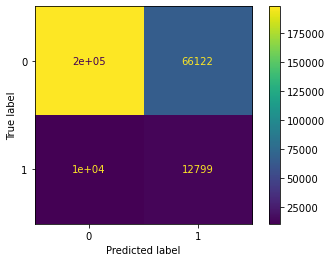

In [110]:
# pour xgboost
Confusion_Mat(Xi, yi, rs_xgb_w.best_estimator_,"xgboost_model")

-----Evaluation du modèle logreg_model----- 
               precision    recall  f1-score   support

     class 0       0.96      0.72      0.82    264297
     class 1       0.17      0.64      0.27     23210

    accuracy                           0.72    287507
   macro avg       0.56      0.68      0.54    287507
weighted avg       0.89      0.72      0.78    287507



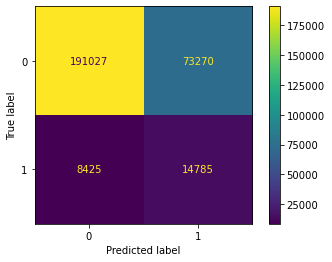

In [112]:
# pour logisticRegression
Xi_scaled = scaler.fit_transform(Xi)
Confusion_Mat(Xi_scaled, yi, rs_lgr_w.best_estimator_,"logreg_model")

In [114]:
Confusion_Mat?

-----Evaluation du modèle new_model----- 
               precision    recall  f1-score   support

     class 0       0.95      0.71      0.81    264297
     class 1       0.15      0.61      0.25     23210

    accuracy                           0.70    287507
   macro avg       0.55      0.66      0.53    287507
weighted avg       0.89      0.70      0.77    287507



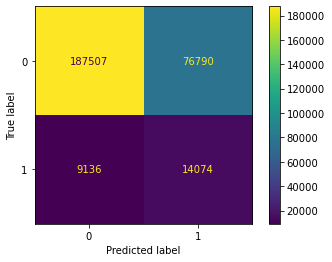

In [ ]:
# pour xgboost
y_pred = rs_xgb_w.best_estimator_.predict(Xi)
cm_ = confusion_matrix(yi, y_pred)
cm_display_ = ConfusionMatrixDisplay(cm_).plot()
cm_display_

target_names = ['class 0', 'class 1']
print("-----Evaluation du modèle {}-----".format("new_model"), "\n", classification_report(yi, y_pred, target_names=target_names))

In [115]:
# Définition des modèles avec leurs meilleurs hyperparamètres
lgbm_model = grid.best_estimator_
logreg_model = rs_lgr_w.best_estimator_
xgb_model = rs_xgb_w.best_estimator_

In [116]:
# courbe roc 
def roc_curve(testX, testy):
    fig, ax = plt.subplots(1, figsize=(11, 11))
    models = {"Olgbm_model" : my_model,
              "lgbm_model" : grid.best_estimator_,
              "logreg_model" : logreg_model,
              "xgb_model" : xgb_model
             }

    for name, model in models.items(): 

        if name != "logreg_model" :
            RocCurveDisplay.from_estimator(
                model, testX, testy, ax=ax, name=name)
        else:
            RocCurveDisplay.from_estimator(
                model, scaler.fit_transform(testX), testy, ax=ax, name=name)
            
    ax.set_title('Receiver Operating Characteristic (ROC) curves', fontsize=15, fontweight="bold")
    ax.grid(linestyle='--')

    plt.legend()
    plt.show()

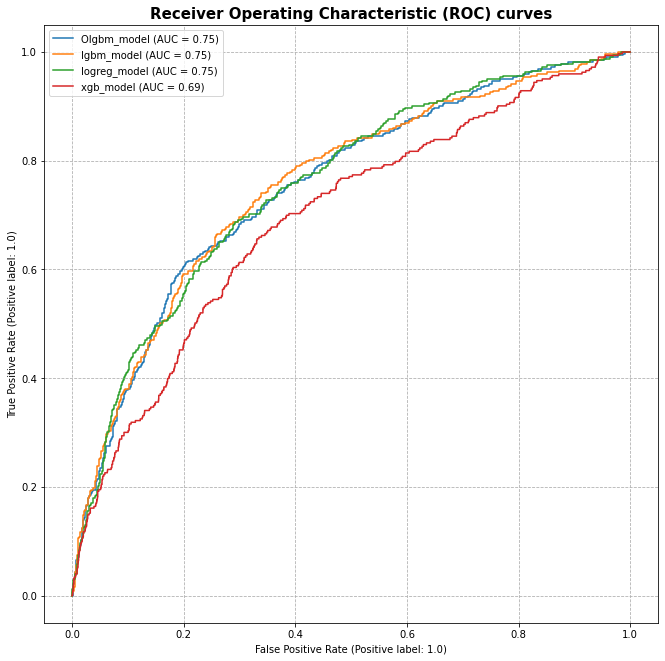

Olgbm_model 0.751
lgbm_model 0.754
log_reg_model 0.754
xgb_model 0.694


In [117]:
roc_curve(X_test, y_test)
print("Olgbm_model {:.3f}".format(roc_auc_score(y_test, my_model.predict_proba(X_test)[:,1])))
print("lgbm_model {:.3f}".format(roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:,1])))
print("log_reg_model {:.3f}".format(roc_auc_score(y_test, logreg_model.predict_proba(scaler.fit_transform(X_test))[:,1])))
print("xgb_model {:.3f}".format(roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])))

### Définition des modèles

In [ ]:
grid.best_estimator_

LGBMClassifier(class_weight='balanced', max_depth=2, n_estimator=400,
               num_leaves=127, reg_alpha=0.1)

In [ ]:
grid.best_params_

{'reg_alpha': 0.1,
 'num_leaves': 127,
 'n_estimator': 400,
 'max_depth': 2,
 'learning_rate': 0.1}

In [125]:
XGBClassifier?

In [128]:
rs_lgr_w.best_params_


{'solver': 'lbfgs', 'max_iter': 100, 'C': 0.001}

In [122]:
grid.best_params_
rs_lgr_w.best_params_
rs_xgb_w.best_params_

{'scale_pos_weight': 14, 'max_depth': 7, 'gamma': 0, 'eta': 0.01}

In [126]:
xgboost_model = XGBClassifier(rs_xgb_w.best_params_, random_sate=0)

C:\Users\nokan\anaconda3\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


In [127]:
xgboost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None,
              objective={'eta': 0.01, 'gamma': 0, 'max_depth': 7,
                         'scale_pos_weight': 14},
              predictor=None, random_state=None, reg_alpha=None, ...)

In [ ]:
fnl_model = LGBMClassifier(class_weight='balanced',
                         learning_rate=0.1,
                         max_depth=2,
                         n_estimator=400,
                         num_leaves=127,
                         reg_alpha=0.1, random_state=0)

logreg_model = LogisticRegression(class_weight='balanced',solver="lbfgs", max_iter=200, C=0.001, random_state=0)
xgboost_model = XGBClassifier(scale_pos_weight=14, max_depth=7, gamma=0, eta=0.01, random_state=0)

In [16]:
# Nouveau jeu de données plus volumineux
trainX, testX, trainy, testy = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True , stratify=y)

In [ ]:
# entrainement du modèle initial obtenu après optimisation avec la métrique roc_auc sur trainX, trainy
my_model.fit(trainX, trainy)

LGBMClassifier(class_weight='balanced', max_depth=3, reg_alpha=0.1)

-----Evaluation du modèle lgbm avec la métrique roc_auc----- 
               precision    recall  f1-score   support

     class 0       0.96      0.71      0.82     56537
     class 1       0.18      0.70      0.28      4965

    accuracy                           0.71     61502
   macro avg       0.57      0.71      0.55     61502
weighted avg       0.90      0.71      0.77     61502



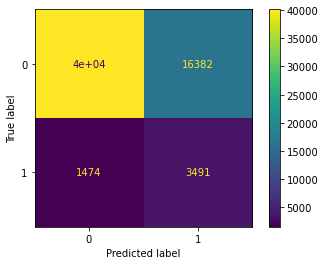

In [ ]:
y_pred = my_model.predict(testX)
cm_ = confusion_matrix(testy, y_pred)
cm_display_ = ConfusionMatrixDisplay(cm_).plot()
cm_display_

target_names = ['class 0', 'class 1']
print("-----Evaluation du modèle {}-----".format("lgbm avec la métrique roc_auc"), "\n", classification_report(testy, y_pred, target_names=target_names))

In [140]:
# modèle original lightGBM évalué avec "roc_auc"
origin_lgbm_model = LGBMClassifier(class_weight='balanced', max_depth=3, reg_alpha=0.1, random_state=0)

In [143]:
# Apprentissage sur un grand train set 80 % des données initiales
fnl_model.fit(trainX, trainy)
trainX_scaled = scaler.fit_transform(trainX)
logreg_model.fit(trainX_scaled, trainy)
xgboost_model.fit(trainX, trainy)
origin_lgbm_model.fit(trainX, trainy)

LGBMClassifier(class_weight='balanced', max_depth=3, random_state=0,
               reg_alpha=0.1)

In [144]:
# création de nouveau dictionnaire

new_dict = { "origin_lgbm_model": origin_lgbm_model,
             "fnl_model": fnl_model,
             "xgboost_model": xgboost_model,
             "logreg_model": logreg_model  
            }

In [33]:
testX_scaled = scaler.fit_transform(testX)

-----Evaluation du modèle origin_lgbm_model----- 
               precision    recall  f1-score   support

     class 0       0.96      0.71      0.82     56537
     class 1       0.18      0.70      0.28      4965

    accuracy                           0.71     61502
   macro avg       0.57      0.71      0.55     61502
weighted avg       0.90      0.71      0.77     61502

-----Evaluation du modèle fnl_model----- 
               precision    recall  f1-score   support

     class 0       0.96      0.70      0.81     56537
     class 1       0.17      0.70      0.28      4965

    accuracy                           0.70     61502
   macro avg       0.57      0.70      0.54     61502
weighted avg       0.90      0.70      0.77     61502

-----Evaluation du modèle xgboost_model----- 
               precision    recall  f1-score   support

     class 0       0.97      0.62      0.75     56537
     class 1       0.15      0.75      0.25      4965

    accuracy                           0.

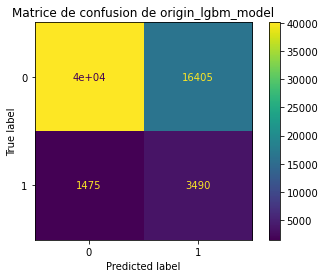

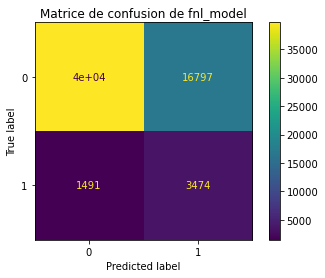

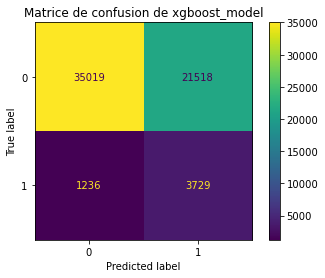

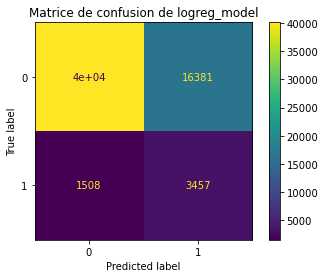

In [154]:
for i, j in new_dict.items():
    if i == "logreg_model":
        Confusion_Mat(testX_scaled, testy, j, i)
    else:
        Confusion_Mat(testX, testy, j, i)
    

-----Evaluation du modèle new_model----- 
               precision    recall  f1-score   support

     class 0       0.96      0.70      0.81     56537
     class 1       0.17      0.70      0.28      4965

    accuracy                           0.70     61502
   macro avg       0.57      0.70      0.54     61502
weighted avg       0.90      0.70      0.77     61502



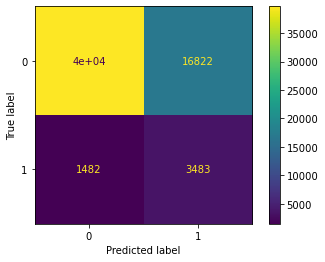

In [ ]:
y_pred = fnl_model.predict(testX)
cm_ = confusion_matrix(testy, y_pred)
cm_display_ = ConfusionMatrixDisplay(cm_).plot()
cm_display_

target_names = ['class 0', 'class 1']
print("-----Evaluation du modèle {}-----".format("new_model"), "\n", classification_report(testy, y_pred, target_names=target_names))

-----Evaluation du modèle new_model----- 
               precision    recall  f1-score   support

     class 0       0.92      0.93      0.93     56537
     class 1       0.14      0.14      0.14      4965

    accuracy                           0.86     61502
   macro avg       0.53      0.53      0.53     61502
weighted avg       0.86      0.86      0.86     61502



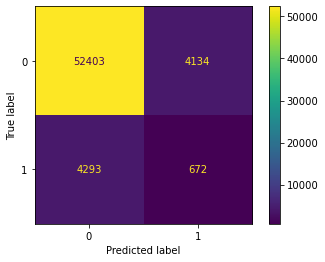

In [ ]:
y_pred = logreg_model.predict(testX)
cm_ = confusion_matrix(testy, y_pred)
cm_display_ = ConfusionMatrixDisplay(cm_).plot()
cm_display_

target_names = ['class 0', 'class 1']
print("-----Evaluation du modèle {}-----".format("new_model"), "\n", classification_report(testy, y_pred, target_names=target_names))

In [ ]:
Xgb_model = XGBClassifier(scale_pos_weight=14, max_depth=6, gamma=0.5, eta=0.01) 

In [ ]:
Xgb_model.fit(trainX, trainy)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [ ]:
print("xgb_model {:.3f}".format(roc_auc_score(testy, xgb_model.predict_proba(testX)[:,1])))

xgb_model 0.684


-----Evaluation du modèle Xgb_model----- 
               precision    recall  f1-score   support

     class 0       0.96      0.62      0.75     56537
     class 1       0.13      0.67      0.22      4965

    accuracy                           0.62     61502
   macro avg       0.54      0.64      0.49     61502
weighted avg       0.89      0.62      0.71     61502



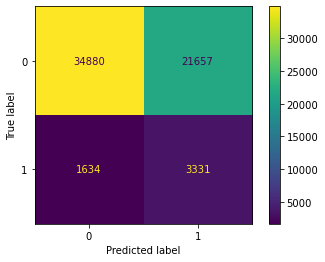

In [ ]:
y_pred = xgb_model.predict(testX)
cm_ = confusion_matrix(testy, y_pred)
cm_display_ = ConfusionMatrixDisplay(cm_).plot()
cm_display_

target_names = ['class 0', 'class 1']
print("-----Evaluation du modèle {}-----".format("Xgb_model"), "\n", classification_report(testy, y_pred, target_names=target_names))

Il faudra entrainer le premier modèle sur (trainX, trainy) et comparer avec le nouveau modèle

In [ ]:
# entrainement des modèle avec comme métrique d'évaluation fbeta, avec beta =3
param_grid = {
              "n_estimator" : np.arange(200, 1000, 100),
              'learning_rate': [0.001, 0.01, 0.1],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
              'num_leaves': [31, 127],
              'reg_alpha': [0.1, 0.5]
              }
cv = StratifiedKFold(5, shuffle=True, random_state=0)
model_lgbm = LGBMClassifier(class_weight='balanced')

# Construction de la métrique d'évaluation
ftwo_scorer_ = make_scorer(fbeta_score, beta=3)

In [157]:
# test de modèles pour beta=3
rs_lgbm_w_ = RandomizedSearchCV(model_lgbm, param_grid, cv=cv, scoring=ftwo_scorer_, n_jobs=-1)
rs_xgb_w_ = RandomizedSearchCV(model_xgb, param_xgb, cv=cv, scoring=ftwo_scorer_, n_jobs=-1)
rs_lgr_w_ = RandomizedSearchCV(model_lgr, param_lgr, cv=cv, scoring=ftwo_scorer_, n_jobs=-1)

In [158]:
# cross validation
rs_lgbm_w_.fit(X_train, y_train)
rs_xgb_w_.fit(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train)
rs_lgr_w_.fit(X_train_scaled, y_train)

[LightGBM] [Warning] Unknown parameter: n_estimator


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=300, random_state=0,
                                                solver='saga'),
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10],
                                        'max_iter': [100, 200, 300, 400],
                                        'solver': ['lbfgs', 'sag', 'saga',
                                                   'newton-cg']},
                   scoring=make_scorer(fbeta_score, beta=3))

In [166]:
xgb_beta3

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [23]:
# définition des modèles avec beta=3
lgbm_beta3 = LGBMClassifier(class_weight='balanced', max_depth=3, n_estimator=400,
                            num_leaves=127, reg_alpha=0.5)
lgr_beta3 = LogisticRegression(C=0.001, class_weight='balanced', max_iter=200,
                               random_state=0, solver='newton-cg')
xgb_beta3 = XGBClassifier(scale_pos_weight=12, max_depth=6, gamma=1, eta=0.01)

In [ ]:
# entrainement des modèles pour beta=3
lgbm_beta3.fit(trainX, trainy)
xgb_beta3.fit(trainX, trainy)

In [26]:
lgbm_beta3

LGBMClassifier(class_weight='balanced', max_depth=3, n_estimator=400,
               num_leaves=127, reg_alpha=0.5)

In [29]:
trainX_scaled = scaler.fit_transform(trainX)

In [30]:
lgr_beta3.fit(trainX_scaled, trainy)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=200,
                   random_state=0, solver='newton-cg')

In [31]:
# création de nouveau dictionnaire

new_dict_ = {
             "lgbm_beta3": lgbm_beta3,
             "xgb_beta3": xgb_beta3,
             "lgr_beta3": lgr_beta3  
            }

-----Evaluation du modèle lgbm_beta3----- 
               precision    recall  f1-score   support

     class 0       0.96      0.71      0.82     56537
     class 1       0.18      0.70      0.28      4965

    accuracy                           0.71     61502
   macro avg       0.57      0.71      0.55     61502
weighted avg       0.90      0.71      0.77     61502

-----Evaluation du modèle xgb_beta3----- 
               precision    recall  f1-score   support

     class 0       0.96      0.67      0.79     56537
     class 1       0.16      0.70      0.25      4965

    accuracy                           0.67     61502
   macro avg       0.56      0.68      0.52     61502
weighted avg       0.90      0.67      0.74     61502

-----Evaluation du modèle lgr_beta3----- 
               precision    recall  f1-score   support

     class 0       0.96      0.71      0.82     56537
     class 1       0.17      0.70      0.28      4965

    accuracy                           0.71     6150

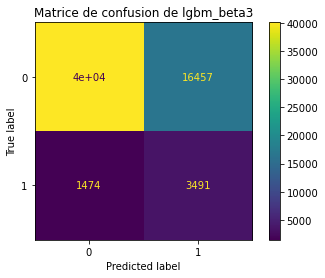

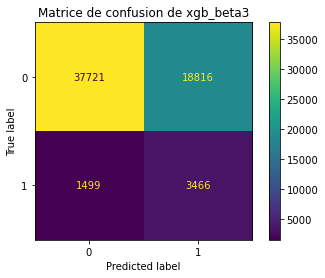

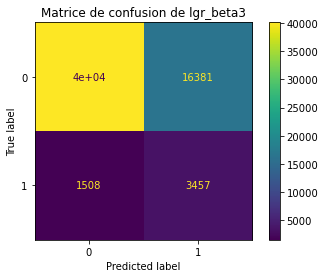

In [34]:
for i, j in new_dict_.items():
    if i == "lgr_beta3":
        Confusion_Mat(testX_scaled, testy, j, i)
    else:
        Confusion_Mat(testX, testy, j, i)

Les résultats avec beta=3 sont, en général, meilleurs qu'avec beta=2, on utilisera comme fonction coût métier F3-score.
On constate que lgbmClassifer donne les meilleurs résultats. On pourrait continuer à entrainer ce dernier en faisant varier beta.
Rappelons que les faux négatifs coûte environ 10 fois plus cher que les faux positifs.

In [ ]:
# voyons pour une dernière fois pour beta = np.sqrt(10)

In [70]:
ftwo_scorer_sqrt = make_scorer(fbeta_score, beta=np.sqrt(10))

In [69]:
np.sqrt(10)

3.1622776601683795

In [ ]:
model_lgbm = LGBMClassifier(class_weight='balanced')

In [85]:
# entrainement des modèle avec comme métrique d'évaluation fbeta

def best_params_search(X_train, y_train, beta, param_grid, param_xgb, param_lgr):

    cv = StratifiedKFold(5, shuffle=True, random_state=0)

    # Construction de la métrique d'évaluation
    ftwo_scorer_ = make_scorer(fbeta_score, beta=beta)

    # test de modèles pour beta=3
    rs_lgbm_w_ = RandomizedSearchCV(model_lgbm, param_grid, cv=cv, scoring=ftwo_scorer_, n_jobs=-1, random_state=0)
    rs_xgb_w_ = RandomizedSearchCV(model_xgb, param_xgb, cv=cv, scoring=ftwo_scorer_, n_jobs=-1, random_state=0)
    rs_lgr_w_ = RandomizedSearchCV(model_lgr, param_lgr, cv=cv, scoring=ftwo_scorer_, n_jobs=-1, random_state=0)

    # cross validation
    rs_lgbm_w_.fit(X_train, y_train)
    rs_xgb_w_.fit(X_train, y_train)
    X_train_scaled = scaler.fit_transform(X_train)
    rs_lgr_w_.fit(X_train_scaled, y_train)

    return rs_lgbm_w_, rs_xgb_w_, rs_lgr_w_

In [ ]:
wneg = np.bincount(y_train)[0]
wpos = np.bincount(y_train)[1]
(wneg / wpos)

In [80]:
param_grid = {"n_estimator" : np.arange(200, 1000, 100),
              'learning_rate': [0.001, 0.01, 0.1],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
              'num_leaves': [31, 127],
              'reg_alpha': [0.1, 0.5]
              }

param_xgb = {"eta":[0.001, 0.01, 0.1, 1],
             'gamma': [0, 0.3, 0.5, 1, 1.5, 2, 5],
             'max_depth': [6, 7, 9, 10],
             "scale_pos_weight":[10, 11, (wneg / wpos),12, 14]
             }

param_lgr = {'C': [0.001, 0.01, 0.1, 1.0, 10],
            'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'],
            'max_iter': [100, 200, 300, 400]
             }

In [86]:
# les modèle à optimiser
model_xgb = XGBClassifier(use_rmm=True, booster="gbtree", random_state=0)
model_lgr = LogisticRegression(random_state=0)
model_lgbm = LGBMClassifier(class_weight='balanced', random_state=0)

In [89]:
rs_lgbm_w_sqrt10, rs_xgb_w_sqrt10, rs_lgr_w_sqrt10 = best_params_search(X_train, y_train, np.sqrt(10), param_grid, param_xgb, param_lgr)

[LightGBM] [Warning] Unknown parameter: n_estimator


C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
rs_lgbm_w_sqrt10.best_params_

{'reg_alpha': 0.5,
 'num_leaves': 31,
 'n_estimator': 600,
 'max_depth': 2,
 'learning_rate': 0.1}

In [91]:
rs_xgb_w_sqrt10.best_params_

{'scale_pos_weight': 11, 'max_depth': 7, 'gamma': 1, 'eta': 0.001}

In [92]:
rs_lgr_w_sqrt10.best_params_

{'solver': 'lbfgs', 'max_iter': 200, 'C': 10}

In [93]:
# définition des modèles avec beta=3
lgbm_beta_sqrt10 = LGBMClassifier(class_weight='balanced', reg_alpha=0.5,
                                     num_leaves=31,
                                     n_estimator=600,
                                     max_depth=2,
                                     learning_rate=0.1)
lgr_beta_sqrt10 = LogisticRegression(class_weight="balanced", solver='lbfgs', max_iter=200, C=10)
xgb_beta_sqrt10 = XGBClassifier(scale_pos_weight=11, max_depth=7, gamma=1, eta=0.001)

In [94]:
# entrainement des modèles pour beta=3
lgbm_beta_sqrt10.fit(trainX, trainy)
xgb_beta_sqrt10.fit(trainX, trainy)
lgr_beta_sqrt10.fit(trainX_scaled, trainy)

C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, class_weight='balanced', max_iter=200)

In [ ]:
model_lgr = LogisticRegression(random_state=0)
lgr_beta_sqrt10.fit(trainX_scaled, trainy)

-----Evaluation du modèle lgbm_beta_sqrt10----- 
               precision    recall  f1-score   support

     class 0       0.96      0.70      0.81     56537
     class 1       0.17      0.70      0.28      4965

    accuracy                           0.70     61502
   macro avg       0.57      0.70      0.54     61502
weighted avg       0.90      0.70      0.77     61502

-----Evaluation du modèle xgb_beta_sqrt10----- 
               precision    recall  f1-score   support

     class 0       0.96      0.71      0.81     56537
     class 1       0.16      0.64      0.26      4965

    accuracy                           0.70     61502
   macro avg       0.56      0.67      0.54     61502
weighted avg       0.89      0.70      0.77     61502

-----Evaluation du modèle lgr_beta_sqrt10----- 
               precision    recall  f1-score   support

     class 0       0.96      0.71      0.82     56537
     class 1       0.18      0.70      0.28      4965

    accuracy                      

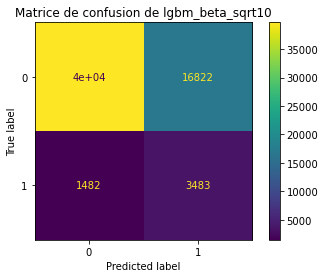

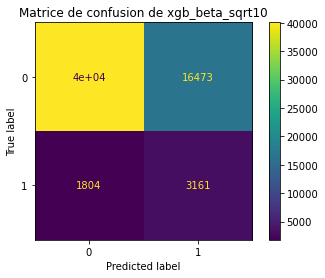

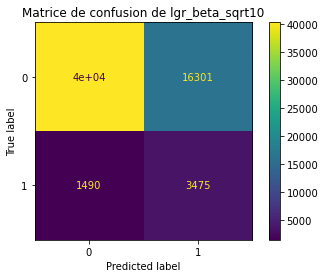

In [95]:
# création de nouveau dictionnaire

new_dict_sqrt10 = {
                    "lgbm_beta_sqrt10": lgbm_beta_sqrt10,
                    "xgb_beta_sqrt10": xgb_beta_sqrt10,
                    "lgr_beta_sqrt10": lgr_beta_sqrt10  
                   }

for i, j in new_dict_sqrt10.items():
    if i == "lgr_beta_sqrt10":
        Confusion_Mat(testX_scaled, testy, j, i)
    else:
        Confusion_Mat(testX, testy, j, i)

In [ ]:
# fonction pour définr la matrice de confusion associée
def Confusion_Mat(X_test, y_test, model, model_name:str):
    y_pred = model.predict(X_test)
    cm_ = confusion_matrix(y_test, y_pred)
    cm_display_ = ConfusionMatrixDisplay(cm_).plot()
    cm_display_
    plt.title("Matrice de confusion de {}".format(model_name))

    target_names = ['class 0', 'class 1']
    print("-----Evaluation du modèle {}-----".format(model_name), "\n", classification_report(y_test, y_pred, target_names=target_names))

Pour une attribution de poids de minimisation de 10 des faux négatifs par rapport aux faux positifs, on a le nombre de faux négatifs qui s'envole, ce qui rend beta=3 optimal par rapport à beta=[2, np.sqrt(10)]

### Sauvegarde du modèle LightClassifier(notre meilleur modèle) et les autres meilleurs modèles optimisés


In [17]:
import joblib
from sklearn.pipeline import make_pipeline

In [99]:
# Sauvegarde de notre modèle optimisé
joblib_file_lgbm= "joblib_lgbm_beta_3_Model.pkl"
joblib_file_xgb = "joblib_xgb_beta_3_Model.pkl"
joblib_file_lgr = "joblib_lgr_beta_sqrt10_Model.pkl"

joblib.dump(lgbm_beta3, joblib_file_lgbm)
joblib.dump(xgb_beta3, joblib_file_xgb)

['joblib_lgr_beta_sqrt10_Model.pkl']

In [23]:
# création d'un pipeline
logreg_beta_sqrt10 = make_pipeline(StandardScaler(), lgr_beta_sqrt10)

In [24]:
logreg_beta_sqrt10.fit(trainX, trainy)

C:\Users\nokan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=200))])

In [110]:
# sauvegarde du modèle logisticRegression intégré dans un pipeline
joblib.dump(logreg_beta_sqrt10, joblib_file_lgr)

['joblib_lgr_beta_sqrt10_Model.pkl']

In [111]:
# sauvegarde du modèle logisticRegression sans pipeline
joblib.dump(lgr_beta_sqrt10, "sp_joblib_lgr_beta_sqrt10_Model.pkl")

['sp_joblib_lgr_beta_sqrt10_Model.pkl']

**LightGBM est le meilleur modèle pour beta=3**.

LogisticRegression obtient un modèle très intéressant pour beta = np.sqrt(10).